# Spectrograms

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

from neurodsp.sim import sim_powerlaw
from neurodsp.utils import set_random_seed

In [2]:
set_random_seed(505)

## Settings

In [3]:
SAVE_FIG = False

In [4]:
# Simulation settings
n_seconds = 25
fs = 1000

exps = [-2, -1.0, 0.]

In [5]:
# Plot settings
cmap = 'inferno'
folder = Path('figures/')

## Simulate Data

In [6]:
# Simulate example powerlaw signals
white = sim_powerlaw(n_seconds, fs, 0)
pink = sim_powerlaw(n_seconds, fs, -1)

In [7]:
# Simulate a combined time series (multiple powerlaw components)
comb = np.array([])
for exp in exps:
    temp = sim_powerlaw(100, fs, exp)
    comb = np.concatenate((comb, temp))

## Compute Spectrograms

Note - are multiple ways to create and plot spectrogram:
- compute with `spectrogram` from scipy, and then plot with `plt.imshow`
- use `plt.specgram` directly from matplotlib

In [8]:
# Compute spectrogram from scipy
f1, t1, pxx = spectrogram(pink, fs)

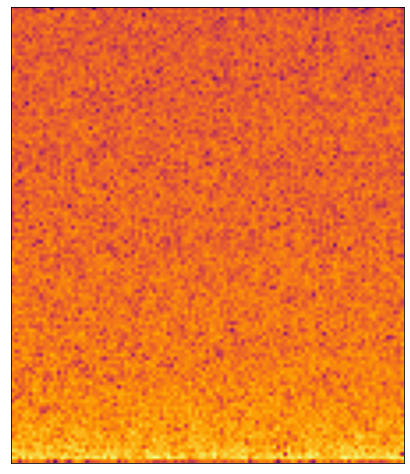

In [9]:
# Plot 
_, ax = plt.subplots(figsize=(15, 8.4))
ax.imshow(np.flipud(10*np.log10(pxx)), cmap=cmap, interpolation='hamming')
ax.set(xticks=[], yticks=[]);
if SAVE_FIG:
    plt.savefig('test.pdf')

### Aperiodic Signal Periodograms

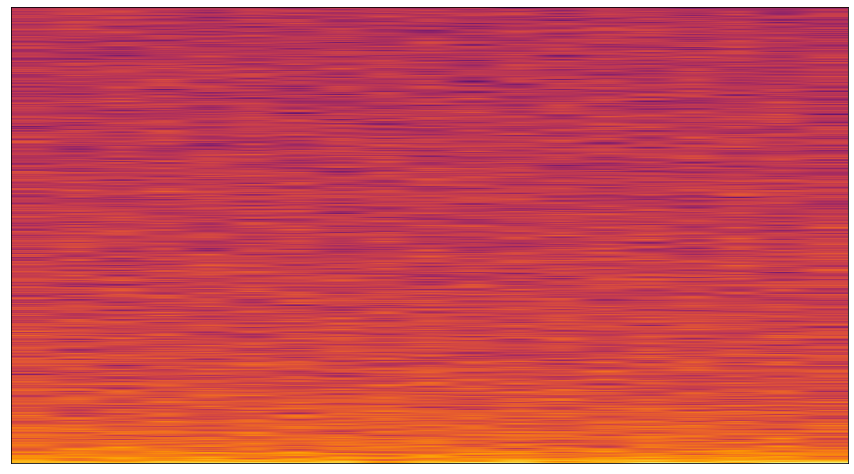

In [10]:
# Plot a spectrogram of pink noise
_, ax = plt.subplots(figsize=(15, 8.4))
pxx, freqs, bins, im = ax.specgram(pink, NFFT=int(2.25*fs), Fs=fs, noverlap=fs, cmap=cmap)
ax.set(xticks=[], yticks=[]);
if SAVE_FIG:
    plt.savefig('pink_noise_spectrogram.pdf')

### Multi-Component Spectrogram

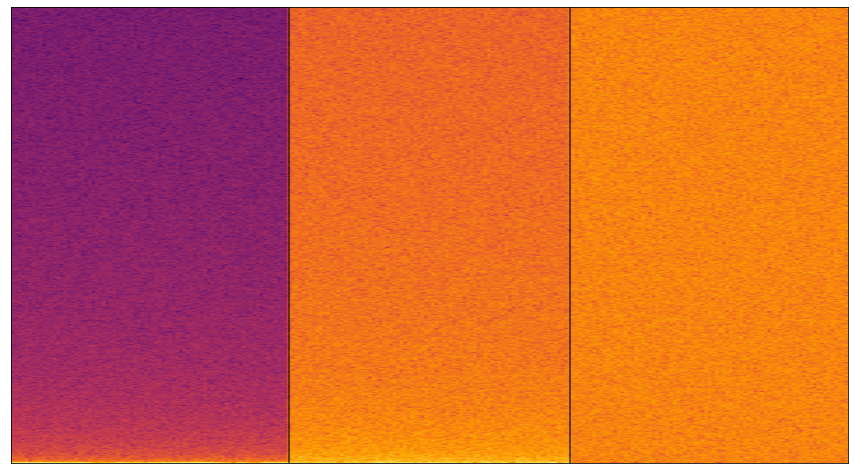

In [11]:
# Plot
_, ax = plt.subplots(figsize=(15, 8.4))
pxx, freqs, bins, im = ax.specgram(comb, NFFT=int(2.25*fs), Fs=fs, noverlap=fs, cmap=cmap)
ax.set(xticks=[], yticks=[]);
ax.axvline(x=100, color='black', alpha=0.75)
ax.axvline(x=200, color='black', alpha=0.75)

if SAVE_FIG:
    plt.savefig('multi_noise_spectrogram_nl.pdf')